# Frequencies Spectra for Individual Particles

In [1]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt

In [2]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0

In [3]:
folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'

In [4]:
pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'

In [5]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [6]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [7]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,741.606,421.285
1,2,0,746.121,429.531
2,3,0,763.478,442.788
3,4,0,840.229,455.421
4,5,0,872.425,455.960


In [8]:
df_linked = tp.link(df_pos, 7.0, memory = 0)

Frame 971: 698 trajectories present.


In [9]:
df_linked.head()

,particle_notrack,frame,x,y,particle
0,1,0,741.606,421.285,0
475,476,0,934.621,669.123,1
476,477,0,969.010,669.361,2
477,478,0,864.212,670.870,3
478,479,0,629.403,670.738,4


In [10]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [11]:
df_roi = df_linked[roi_condition]

In [12]:
df_roi.size

79670

In [13]:
df_linked.size

3493110

In [14]:
particles_listing = np.unique(df_roi['particle'])

In [15]:
type(particles_listing)

numpy.ndarray

In [16]:
particles_listing

array([   113,    116,    360, ..., 164277, 164286, 164289], dtype=int64)

In [17]:
len(particles_listing)

3390

In [18]:
traj_113 = df_roi[df_roi['particle'] == 113]

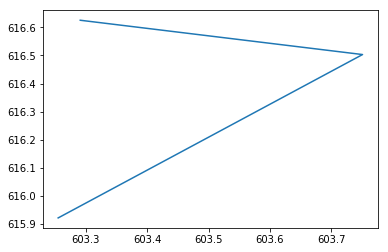

In [19]:
fig, ax = plt.subplots()
ax.plot(traj_113['x'], traj_113['y'])


In [20]:
arr_traj_lengths = np.empty(len(particles_listing))

In [21]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [22]:
np.max(arr_traj_lengths)

742.0

In [23]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [24]:
pd_traj_len.head()

,particle,tr_len
0,113,3.0
1,116,15.0
2,360,2.0
3,381,3.0
4,542,7.0


In [25]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [26]:
pd_traj_len.head(20)

,particle,tr_len
11,579,742.0
18,626,467.0
1709,79028,406.0
2205,101818,371.0
15,605,200.0
594,26191,192.0
664,29889,165.0
7,559,151.0
13,593,138.0
1438,65787,124.0


In [27]:
traj_579 = df_roi[df_roi['particle'] == 579]
N = len(traj_579['x'])

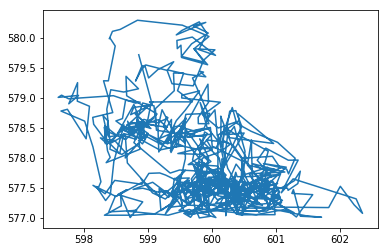

In [28]:

fig, ax = plt.subplots()
ax.plot(traj_579['x'], traj_579['y'])

In [29]:
arr_time = np.linspace(0.0, 1.0 / fps * len(traj_579['x']), len(traj_579['x']))
arr_time

array([0.        , 0.01011464, 0.02022928, 0.03034393, 0.04045857,
       0.05057321, 0.06068785, 0.07080249, 0.08091713, 0.09103178,
       0.10114642, 0.11126106, 0.1213757 , 0.13149034, 0.14160498,
       0.15171963, 0.16183427, 0.17194891, 0.18206355, 0.19217819,
       0.20229283, 0.21240748, 0.22252212, 0.23263676, 0.2427514 ,
       0.25286604, 0.26298068, 0.27309533, 0.28320997, 0.29332461,
       0.30343925, 0.31355389, 0.32366853, 0.33378318, 0.34389782,
       0.35401246, 0.3641271 , 0.37424174, 0.38435638, 0.39447103,
       0.40458567, 0.41470031, 0.42481495, 0.43492959, 0.44504423,
       0.45515888, 0.46527352, 0.47538816, 0.4855028 , 0.49561744,
       0.50573208, 0.51584673, 0.52596137, 0.53607601, 0.54619065,
       0.55630529, 0.56641993, 0.57653458, 0.58664922, 0.59676386,
       0.6068785 , 0.61699314, 0.62710779, 0.63722243, 0.64733707,
       0.65745171, 0.66756635, 0.67768099, 0.68779564, 0.69791028,
       0.70802492, 0.71813956, 0.7282542 , 0.73836884, 0.74848

In [30]:
intensities = np.fft.fft(traj_579['x'])

In [31]:
freqs = np.fft.fftfreq(len(traj_579['x']), 1.0 / fps)[:N//2]

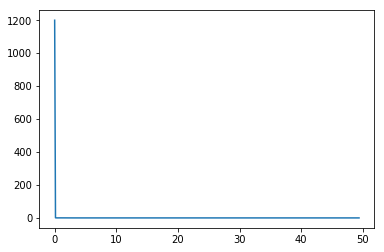

In [32]:
fig, ax = plt.subplots()
ax.plot(freqs, 2.0 / N * np.abs(intensities[0:N//2]))

In [33]:
N

742

In [34]:
slope, intercept = np.polyfit(arr_time, traj_579['x'], 1)

In [35]:
arr_x_nodrift = traj_579['x'] - (slope * arr_time + intercept)

In [36]:
intensities = np.fft.fft(arr_x_nodrift)
freqs = np.fft.fftfreq(len(arr_x_nodrift), 1.0 / fps)[:N//2]

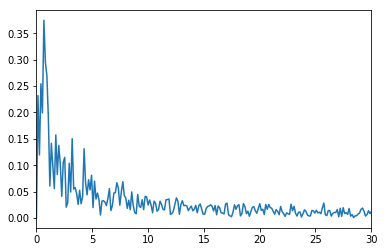

In [37]:
fig, ax = plt.subplots()
ax.set_xlim(0, 30)
ax.plot(freqs, 2.0 / N * np.abs(intensities[0:N//2]))

In [60]:
def get_spectrum(arr_t, arr_sig):
    slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    arr_sig_nodrift = arr_sig - (slope * arr_t + intercept)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [39]:
test_arr_freqs, test_arr_intens = get_spectrum(arr_time, traj_579['x'])

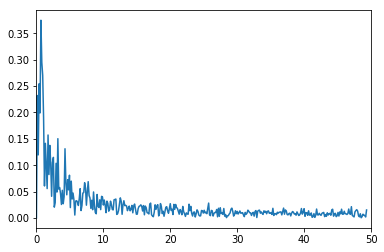

In [40]:
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.plot(test_arr_freqs, 2.0 / N * np.abs(test_arr_intens[0:N//2]))

In [41]:
t_time = np.arange(0, 10, 0.0001)+ 50.0

In [42]:
t_sig = 10.0 * np.sin(math.pi * 2.0 * t_time * 1) + 100

In [43]:
t_f, t_int = get_spectrum(t_time, t_sig)

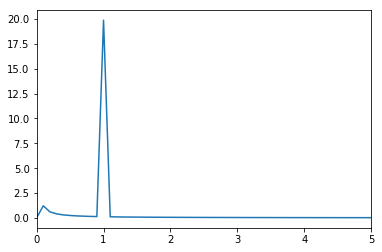

In [44]:
fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.plot(t_f, 2.0 / len(t_f) * np.abs(t_int)[0:len(t_int)//2])

In [45]:
len(2.0 / len(t_f) * np.abs(t_int)[0:len(t_int)//2])

50000

In [46]:
len(t_f)

50000

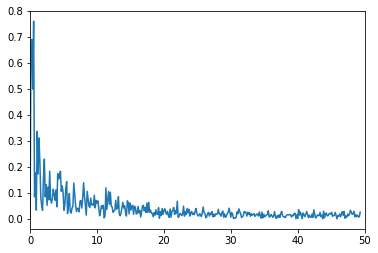

In [54]:
t_f, t_int = get_spectrum(arr_time, traj_579['y'])
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
#ax.set_ylim(0, 0.1)
ax.plot(t_f, 2.0 / len(t_f) * np.abs(t_int)[0:len(t_int)//2])

In [48]:
arr_longs = np.array(pd_traj_len['particle'])
for i in range(0, 100):
    cur_particle = arr_longs[i]
    df_cur_traj = df_roi[df_roi['particle'] == cur_particle]
    arr_time = np.linspace(0.0, 1.0 / fps * len(df_cur_traj['x']), len(df_cur_traj['x']))
    arr_signal = np.array(df_cur_traj['x'])
    arr_f, arr_intens = get_spectrum(arr_time, arr_signal)
    ind_max = np.argmax(np.abs(arr_intens[0:len(arr_intens)//2]))
    max_f = arr_f[ind_max]
    print(cur_particle, ' ', max_f)
    
    
    

579   0.6662168249286184
626   0.6346124747236219
79028   0.2432417675750443
101818   0.5322541975138222
605   1.9701
26191   1.02587890625
29889   0.5963636363636364
559   0.6512872242445507
593   1.4243856332703213
65787   0.7919484911550467
58515   2.6050591275745947
148401   8.08077372728239
85466   1.075957010022944
44045   37.11905143406505
95934   1.2690166975881263
111013   1.2854916897506923
72597   6.687933946331393
53735   6.779513888888888
113619   1.3559027777777777
39340   4.241965973534971
91256   1.522705078125
124969   3.09297052154195
73716   3.1420395421436003
154871   3.2990519965527145
151550   1.6774673008323422
128478   3.4127423822714684
120800   3.4127423822714684
93837   6.945153061224489
592   7.069090909090908
21204   3.5987654320987654
70951   1.832680669277323
63848   1.867233727810651
156060   3.734467455621302
150678   3.9583506872136605
102172   1.9791753436068302
10479   37.10819375282932
142632   6.316162570888467
77387   4.210775047258978
31742   6.4

In [49]:
arr_longs

array([   579,    626,  79028, ...,  67101,  67107, 164289], dtype=int64)

In [50]:
74871

74871

In [63]:
traj_74871 = df_roi[df_roi['particle'] == 74871]
N = len(traj_74871['x'])
arr_time = np.linspace(0.0, 1.0 / fps * N, N)

In [64]:
arr_time

array([0.        , 0.0104071 , 0.0208142 , 0.0312213 , 0.04162841,
       0.05203551, 0.06244261, 0.07284971, 0.08325681, 0.09366391,
       0.10407101, 0.11447811, 0.12488522, 0.13529232, 0.14569942,
       0.15610652, 0.16651362, 0.17692072, 0.18732782, 0.19773493,
       0.20814203, 0.21854913, 0.22895623, 0.23936333, 0.24977043,
       0.26017753, 0.27058463, 0.28099174, 0.29139884, 0.30180594,
       0.31221304, 0.32262014, 0.33302724, 0.34343434])

34


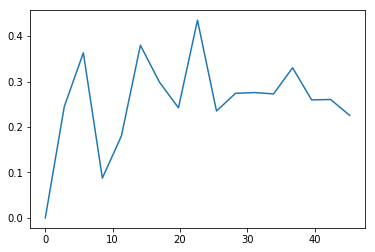

In [66]:
t_f, t_int = get_spectrum(arr_time, traj_74871['x'])
fig, ax = plt.subplots()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 0.1)
ax.plot(t_f, np.array(2.0 / len(t_f) * np.abs(t_int)[0:len(t_int)//2]))

In [ ]:
len(t_f)

In [ ]:
len(t_int)

In [ ]:
len(2.0 / len(t_f) * np.abs(t_int)[0:len(t_int)//2])

In [ ]:
len(np.array(2.0 / len(t_f) * np.abs(t_int)[0:len(t_int)//2]))

In [ ]:
len(t_f)

In [59]:
N = len(traj_74871['x'])
N

34